In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot

In [55]:
sent = ['the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',
    'This is a large sentence with many words contained within it without extra efforts']

In [56]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good',
 'This is a large sentence with many words contained within it without extra efforts']

In [57]:
all_words = []
for line in sent:
    all_words.extend(line.lower().split())
unique_words = set(all_words)
print(unique_words)    

{'words', 'without', 'videos', 'your', 'i', 'large', 'a', 'extra', 'developer', 'milk', 'is', 'with', 'meaning', 'the', 'of', 'cup', 'contained', 'efforts', 'are', 'sentence', 'glass', 'many', 'it', 'this', 'juice', 'understand', 'good', 'boy', 'tea', 'am', 'within'}


In [58]:
voc_size = 200

# one hot representation

In [17]:
tf.random.set_seed(7)
one_hot_repr = [one_hot(line,voc_size) for line in sent]
print(one_hot_repr)

[[88, 142, 84, 182], [88, 142, 84, 119], [88, 22, 84, 188], [37, 52, 38, 191, 154], [37, 52, 38, 191, 96], [48, 88, 149, 84, 3], [150, 92, 52, 191], [79, 102, 38, 193, 153, 27, 159, 3, 149, 198, 139, 72, 63, 42]]


# Word Embedding Representation

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [19]:
import numpy as np

In [21]:
sent_length = 8
embedded_docs = pad_sequences(one_hot_repr,padding = 'pre',maxlen=sent_length)
print(embedded_docs)

[[  0   0   0   0  88 142  84 182]
 [  0   0   0   0  88 142  84 119]
 [  0   0   0   0  88  22  84 188]
 [  0   0   0  37  52  38 191 154]
 [  0   0   0  37  52  38 191  96]
 [  0   0   0  48  88 149  84   3]
 [  0   0   0   0 150  92  52 191]
 [159   3 149 198 139  72  63  42]]


In [22]:
dim=2


In [23]:
model = Sequential()
model.add(Embedding(voc_size,dim,input_length = len(embedded_docs[0])))
model.compile('adam','mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 2)              400       
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(model.predict(embedded_docs))

[[[ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.04695344 -0.01071633]
  [ 0.03865533 -0.03163431]
  [ 0.01448913  0.0473124 ]
  [ 0.03458614 -0.00264077]]

 [[ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.04695344 -0.01071633]
  [ 0.03865533 -0.03163431]
  [ 0.01448913  0.0473124 ]
  [-0.04006144  0.00516013]]

 [[ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.04695344 -0.01071633]
  [ 0.01102561 -0.03453939]
  [ 0.01448913  0.0473124 ]
  [-0.00386601 -0.03958908]]

 [[ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.02909621 -0.02622317]
  [-0.0064308  -0.01034187]
  [-0.04632637 -0.0220066 ]
  [ 0.01658423 -0.04800677]
  [-0.00624676  0.00788671]]

 [[ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.03344538 -0.02666334]
  [ 0.029096

In [26]:
embedded_docs[0]

array([  0,   0,   0,   0,  88, 142,  84, 182])

In [34]:
weights = model.get_weights()[0]

In [35]:
len(weights)

200

In [36]:
weights

array([[ 0.03344538, -0.02666334],
       [ 0.03796519, -0.04533508],
       [ 0.03034968,  0.04420098],
       [-0.00143952,  0.04596517],
       [ 0.01588157, -0.03873085],
       [-0.00700765,  0.01038801],
       [-0.04060618, -0.04176734],
       [ 0.03750939,  0.04595978],
       [-0.02551267, -0.00301931],
       [ 0.02515631,  0.03360501],
       [ 0.03556993, -0.01981859],
       [ 0.03269407, -0.00060993],
       [ 0.01365357, -0.02075658],
       [ 0.04494889,  0.00301058],
       [-0.03164674,  0.00837336],
       [ 0.03967536,  0.00347773],
       [-0.02016296, -0.04226519],
       [-0.03233677, -0.01555164],
       [-0.00770676,  0.01837962],
       [-0.00112754,  0.00376346],
       [ 0.04162434, -0.01652505],
       [-0.04328135,  0.03402582],
       [ 0.01102561, -0.03453939],
       [-0.02675917,  0.02687037],
       [ 0.00492232,  0.00414323],
       [-0.0353582 ,  0.01978463],
       [-0.03572295, -0.0168393 ],
       [ 0.04705286, -0.03873055],
       [-0.04769203,

In [40]:
print(model.predict(embedded_docs)[0])

[[ 0.03344538 -0.02666334]
 [ 0.03344538 -0.02666334]
 [ 0.03344538 -0.02666334]
 [ 0.03344538 -0.02666334]
 [ 0.04695344 -0.01071633]
 [ 0.01102561 -0.03453939]
 [ 0.01448913  0.0473124 ]
 [-0.00386601 -0.03958908]]


In [50]:
# We can find seq_no of any word using this dictionary
unique_word_dict.get('boy')

6

In [51]:
# Using seq no of a word we can find weights assigned to that word
weights[unique_word_dict.get('boy')]

array([-0.04060618, -0.04176734], dtype=float32)

In [52]:
np.mean(weights[unique_word_dict.get('boy')])

-0.041186757

In [53]:
# Original 3D matrix generated after word embedding
model.predict(embedded_docs).shape

(8, 8, 2)

In [59]:
np.mean(model.predict(embedded_docs),axis=2).shape

(8, 8)

In [63]:
np.mean(model.predict(embedded_docs),axis=2)

array([[ 0.00339102,  0.00339102,  0.00339102,  0.00339102,  0.01811856,
         0.00351051,  0.03090077,  0.01597269],
       [ 0.00339102,  0.00339102,  0.00339102,  0.00339102,  0.01811856,
         0.00351051,  0.03090077, -0.01745065],
       [ 0.00339102,  0.00339102,  0.00339102,  0.00339102,  0.01811856,
        -0.01175689,  0.03090077, -0.02172755],
       [ 0.00339102,  0.00339102,  0.00339102,  0.00143652, -0.00838634,
        -0.03416648, -0.01571127,  0.00081998],
       [ 0.00339102,  0.00339102,  0.00339102,  0.00143652, -0.00838634,
        -0.03416648, -0.01571127,  0.00579567],
       [ 0.00339102,  0.00339102,  0.00339102, -0.00542249,  0.01811856,
         0.00549808,  0.03090077,  0.02226282],
       [ 0.00339102,  0.00339102,  0.00339102,  0.00339102,  0.00176935,
         0.0078215 , -0.00838634, -0.01571127],
       [-0.01381762,  0.02226282,  0.00549808, -0.00374818,  0.00592889,
        -0.00401533,  0.0346232 , -0.00871381]], dtype=float32)

In [ ]:
# create mapping of word and its weights

In [69]:
weights = model.get_weights()[0]
# Creating a dictionary to store the embeddings in. The key is 
#a unique word and the value is the numeric vector
embedding_dict = {}
for word in all_words:
    embedding_dict.update({word : weights[unique_word_dict.get(word)]})
    

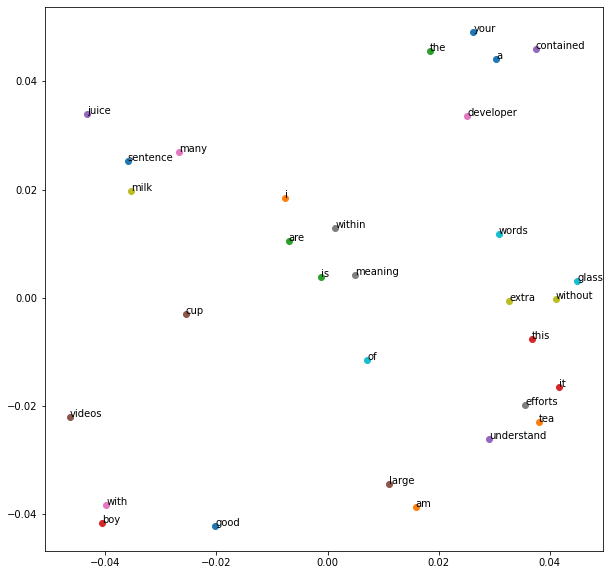

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for word in list (unique_word_dict.keys()):
    X = embedding_dict.get(word)
    plt.scatter(X[0],X[1])
    plt.annotate(word, (X[0],X[1]))
    